# Desbalance en el tiempo

Para visualizar la evolución del desbalance en el tiempo en los datos históricos se ordena el df en forma ascendente por la fecha de sorteo. Luego, se va recorriendo y en cada fecha se le agrega una causa al jusgado que salió sorteado. De esa forma se tiene para cada fecha cuantas causas hay en cada juzgado. Por último para graficar el desbalance se utilizan tres medidad diferentes:
    - La diferencia entre el jusgado que más causas tiene y el que menos (curva negra).
    - La diferencia entre el juzgado que menos causas tiene contra el promedio (curva azul).
    - La diferencia entre el juzgado que más causas tiene contra el promedio (curva roja).

Text(0,0.5,'Desbalance')

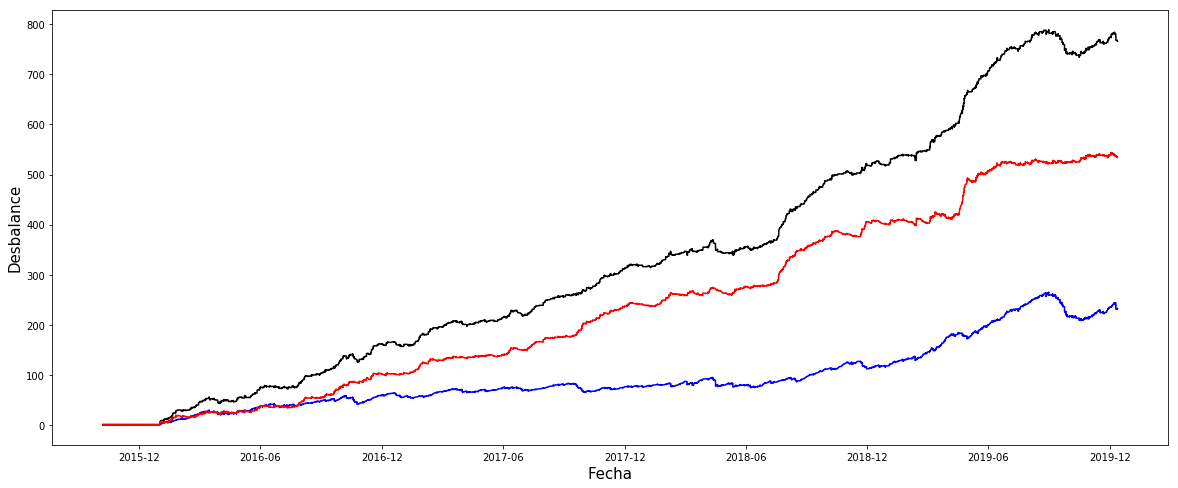

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('penal_df.csv')
df['exp_fecsor'] = pd.to_datetime(df['exp_fecsor'])
df = df.sort_values(by=['exp_fecsor'], ascending=True)
causas=np.zeros(31)
desbalance = []
desbalance_prom_min = []
desbalance_prom_max = []
fecha = []
jj = 0
for ii in range(len(df)):
    if 'JUZP' in df.org_cod_pri.iloc[ii]:
        causas[int(df.org_cod_pri.iloc[ii][4:6])-1] += 1
        desbalance.append(np.max(causas)-np.min(causas))
        desbalance_prom_min.append(np.mean(causas)-np.min(causas))
        desbalance_prom_max.append(np.max(causas)-np.mean(causas))        
        fecha.append(df.exp_fecsor.iloc[ii])
          
ifig, ax = plt.subplots(figsize=(20, 8))        
plt.plot(fecha,desbalance,'k-')
plt.plot(fecha,desbalance_prom_min,'b-')
plt.plot(fecha,desbalance_prom_max,'r-')
ax.set_xlabel('Fecha', fontsize=15)
ax.set_ylabel('Desbalance', fontsize=15)

El inconveniete que tiene estoy es que las causas se van acumulando, pero puede ser que alguna ya esté cerrada o se cierre durante el período que estamos analizando. Entonces esas causas que se van cerrando, habría que ir restándolas de la carga de trabajo del juzgado.

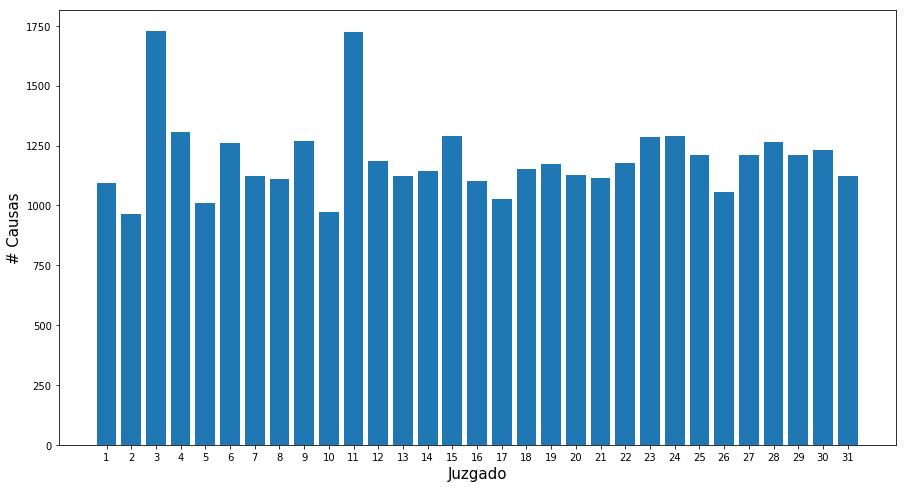

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(31)+1.0
ax.bar(x,causas)
ax.set_xlabel('Juzgado', fontsize=15)
ax.set_ylabel('# Causas', fontsize=15)
x_ticks = ax.set_xticks(x)

## Ahora realizaremos el mísmo gráfico pero sin considerar los juzgados 3 y 11 que tienen una cantidad anómala de causas.

Text(0,0.5,'Desbalance')

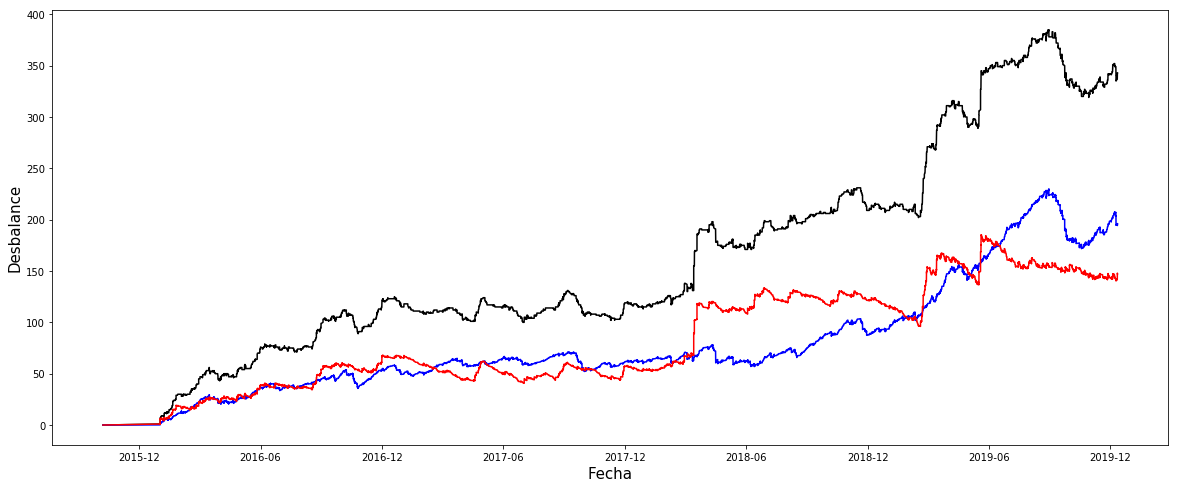

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('penal_df.csv')
df['exp_fecsor'] = pd.to_datetime(df['exp_fecsor'])
df = df.sort_values(by=['exp_fecsor'], ascending=True)
causas=np.zeros(31)
desbalance = []
desbalance_prom_min = []
desbalance_prom_max = []
fecha = []
jj = 0
ind=[0,1,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
for ii in range(len(df)):
    if 'JUZP' in df.org_cod_pri.iloc[ii]:
        causas[int(df.org_cod_pri.iloc[ii][4:6])-1] += 1
        desbalance.append(np.max(causas[ind])-np.min(causas[ind]))
        desbalance_prom_min.append(np.mean(causas[ind])-np.min(causas[ind]))
        desbalance_prom_max.append(np.max(causas[ind])-np.mean(causas[ind]))        
        fecha.append(df.exp_fecsor.iloc[ii])
          
ifig, ax = plt.subplots(figsize=(20, 8))        
plt.plot(fecha,desbalance,'k-')
plt.plot(fecha,desbalance_prom_min,'b-')
plt.plot(fecha,desbalance_prom_max,'r-')
ax.set_xlabel('Fecha', fontsize=15)
ax.set_ylabel('Desbalance', fontsize=15)

Para recordar:
- La diferencia entre el jusgado que más causas tiene y el que menos (curva negra).
- La diferencia entre el juzgado que menos causas tiene contra el promedio (curva azul).
- La diferencia entre el juzgado que más causas tiene contra el promedio (curva roja).

Observaciones:
- Durante todo 2016 el desbalance crece en forma pareja en las tres curvas.
- Durante todo 2017 y principio de 2018 el desbalance se mantiene aproximadamente constante. Entonces durante ese período la asignación fue pareja para esos juzgados.
- El salto que se observa en la curva negra y la roja en marzo/abril 2018 se debe a un único juzgado, el juzgado 19 que aumenta mucho la cantidad de casos respecto al resto de los juzgados (lo pueden ver en el video "Exploracion3b_Video_sin_Juz_3_11.mp4").
- Luego hay otro salto grande en la curva negra y la roja durante febrero/marzo 2019 que también se debe al juzgado 19 que aumenta mucho la cantidad de casos respecto al resto de los juzgados (lo pueden ver en el video  "Exploracion3b_Video_sin_Juz_3_11.mp4").
- Luego hay otro salto grande en la curva negra y la roja durante mayo 2019 que se debe al juzgado 23 que aumenta mucho la cantidad de casos y supera incluso al 19 (lo pueden ver en el video  "Exploracion3b_Video_sin_Juz_3_11.mp4").
- Durante la primer mitad de 2019 hay un aumento sostenido de la curva azul también más allá de los saltos puntuales de la curva roja.


## Viendo que detectamos un par de juzgados que también tienen compartamientos puntuales a analizar, volvemos a hacer los gráficos sacando ahora los juzgados 19 y 23 también.

Text(0,0.5,'Desbalance')

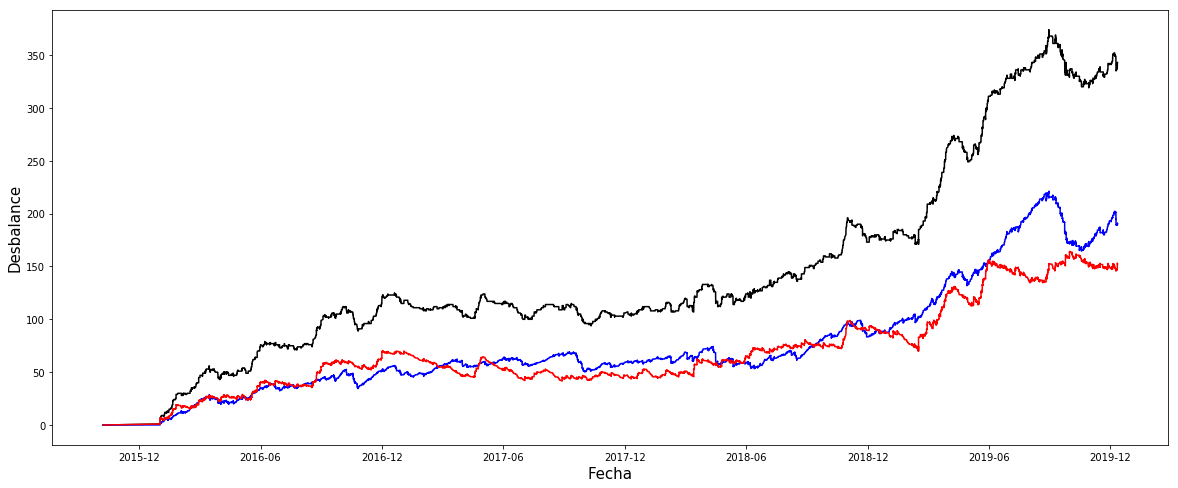

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('penal_df.csv')
df['exp_fecsor'] = pd.to_datetime(df['exp_fecsor'])
df = df.sort_values(by=['exp_fecsor'], ascending=True)
causas=np.zeros(31)
desbalance = []
desbalance_prom_min = []
desbalance_prom_max = []
fecha = []
jj = 0
ind=[0,1,3,4,5,6,7,8,9,11,12,13,14,15,16,17,19,20,21,23,24,25,26,27,28,29,30]
for ii in range(len(df)):
    if 'JUZP' in df.org_cod_pri.iloc[ii]:
        causas[int(df.org_cod_pri.iloc[ii][4:6])-1] += 1
        desbalance.append(np.max(causas[ind])-np.min(causas[ind]))
        desbalance_prom_min.append(np.mean(causas[ind])-np.min(causas[ind]))
        desbalance_prom_max.append(np.max(causas[ind])-np.mean(causas[ind]))        
        fecha.append(df.exp_fecsor.iloc[ii])
          
ifig, ax = plt.subplots(figsize=(20, 8))        
plt.plot(fecha,desbalance,'k-')
plt.plot(fecha,desbalance_prom_min,'b-')
plt.plot(fecha,desbalance_prom_max,'r-')
ax.set_xlabel('Fecha', fontsize=15)
ax.set_ylabel('Desbalance', fontsize=15)

Observaciones:

- Durante todo 2016 el desbalance crece en forma pareja en las tres curvas.
- Durante todo 2017 y hasta junio 2018 el desbalance se mantiene aproximadamente constante. Entonces durante ese período la asignación fue pareja para esos juzgados.
- Desde junio 2018 hasta marzo 2019 el sebalance crece en forma paulatina.
- Desde Marzo 2019 hasta septiembre 2019 el desbalance crece en forma fuerte.

Para ver cómo evoluciona este caso está el video "Exploracion3b_Video_sin_Juz_3_11_19_23.mp4"